# Text classification with neural networks via ```scikit-learn```

## Import packages


In [7]:
# system tools
import os
os.system("pip install pandas scikit-learn matplotlib numpy seaborn")
import sys

# data munging tools
import pandas as pd

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:00a 0:00:01



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [9]:
# load the data to pandas csv
fp = "/work/cds-lang-data/classification_data/fake_or_real_news.csv"

df = pd.read_csv(fp)


In [16]:
# create data variables containing data and labels

df_var = df[["text","label"]]

## Train-test split

Looking back at the code from last week, use the ```train_test_split()``` function to create an 80/20 split in the data.

In [18]:
# add your train/test split code here

df_train, df_test = train_test_split(df_var,test_size=.2, train_size=.8, random_state=123)

In [22]:
#separate? y by x 

x_train, y_train = df_train["text"],df_train["label"]
x_test, y_test = df_test["text"],df_test["label"]

## Vectorizing and Feature Extraction

__Create vectorizer object__

Next, you want to create a vectorizer object. I suggest the following parameters:

- TfidfVectorizer on unigrams and bigrams;
- make everything lowercase; 
- remove top and bottom 5% of words; 
- keep the top 500 features.

In [23]:
# add your vectorizer code here

vectit = TfidfVectorizer(ngram_range=(1,2),
                        lowercase = True,
                        max_df = .95,
                        min_df = .05,
                        max_features = 500)

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [33]:
# fit the vectorizer to the data

x_train_features = vectit.fit_transform(x_train)
x_test_features = vectit.transform(x_test)

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

__Simple neural network__

We can define simple NN classifiers using the ```MLPClassifier``` class in ```scikit-learn```. I've done that for you here - can you see how it's been put together?

For more information, check out the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [34]:
classifier = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,),
                           max_iter=1000,
                           random_state = 42)

In [35]:
# fit the classifier to the data

fit_classifier = classifier.fit(x_train_features,y_train)

__Get predictions__

We want to use our trained model to get predicted labels on our test data.

In [36]:
# get predictions
y_pred_test = fit_classifier.predict(x_test_features)

## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

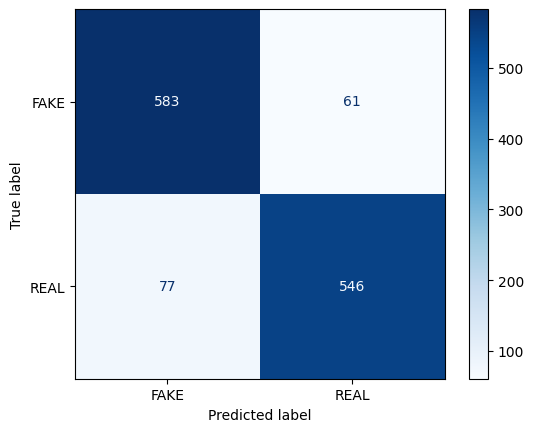

In [37]:
# use confusion matrix to check performance

metrics.ConfusionMatrixDisplay.from_estimator(fit_classifier,           
                                            x_test_features,          
                                            y_test,                
                                            cmap=plt.cm.Blues,      
                                            labels=["FAKE", "REAL"],
                                            title)

__Calculating metrics__

We can use the same built-in classification report from ```scikit-learn``` to get the classification report for our model.

In [39]:
# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred_test)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.88      0.91      0.89       644
        REAL       0.90      0.88      0.89       623

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



__Plotting loss curves__

If our model is learning well, we should see a smooth, steep downwards slope which tapers off towards a plateau. 

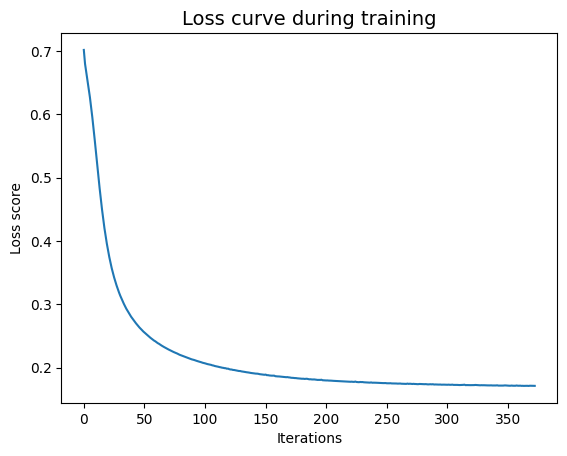

In [41]:
plt.plot(fit_classifier.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()

## Save models

As last week, it's possible to save an ```MLPClassifier``` model for later use using the library ```joblib```.

In [43]:
from joblib import dump, load
dump(fit_classifier, "MLP_classifier.joblib")
dump(vectit, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [1]:
from joblib import dump, load
loaded_clf = load("MLP_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

In [13]:
sentence = "It is my firm belief, that lizard people have not overtaken the government."

Notice that we pass a ```list``` of ```str```, even if we only have one:

In [14]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype='<U4')